DATASET: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

### Planteamiento del problema de negocio

En este estudio, nuestro objetivo es predecir el salario de profesionales en ciencia de datos en función de diversas variables relacionadas con el trabajo, la experiencia y la ubicación.

Hemos elegido el conjunto de datos "Salarios de ciencia de datos 2023" porque:
Contiene información relevante como título del trabajo, nivel de experiencia, tipo de empleo, ubicación de la empresa y salario .
Incluye variables numéricas y categóricas , lo que permite aplicar técnicas de preprocesamiento como PCA (no supervisado) y modelos de regresión (supervisado) .

El salario es una variable continua , lo que nos lleva a un problema de regresión en lugar de clasificación.
Es útil en la vida real: entender qué factores influyen en el salario puede ayudar tanto a compañeros como a profesionales de datos.
 



In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("./data/ds_salaries.csv")
df

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

### Estructura del análisis

Vamos a dividir el análisis en varias fases:

* **1️ Exploración y análisis inicial de los datos.**


Antes de aplicar cualquier modelo, debemos entender cómo están estructurados los datos:

• Distribución de la variable objetivo (salario) → Ver si es normal, sesgada, etc

• Correlación entre variables numéricas → Identificar si hay relaciones fuertes con el salario.

• Análisis de la cardinalidad de las variables categóricas → Ver cuántos valores únicos hay en cada una (ejemplo: ¿cuántos títulos de trabajo diferentes existen?).

• Detección de valores atípicos (outliers) → Salarios extremadamente altos o bajos podrían distorsionar el modelo.

• Manejo de valores nulos → Determinar si hay datos faltantes y cómo tratarlos.


* **2️ Aplicación de un modelo no supervisado: PCA**

  
Antes de entrenar un modelo de regresión, queremos reducir la dimensionalidad con PCA para:

• Identificar patrones ocultos en los datos numéricos.

• Reducir la redundancia si hay variables muy correlacionadas.

• Visualice los datos en un espacio de menor dimensión y ver si se pueden agrupar según ciertas características.

El PCA solo se aplicará a variables numéricas, así que las categóricas aún no se transforman en esta etapa.

* **3️ Preparación de los datos para el modelo supervisado**

  
#### Aquí ya nos preparamos para la regresión:

a) Creación del Pipeline de preprocesamiento

Dentro del Pipeline aplicaremos:

• OneHotEncoding a variables categóricas: Convertimos texto en variables numéricas.

• Estandarización o normalización de variables numéricas: PCA y modelos de regresión funcionan mejor con datos escalados.

• Manejo de valores desconocidos en prueba : Configuramos OneHotEncoder(handle_unknown='ignore')para evitar errores si aparecen categorías nuevas en prueba.

b) División Tren/Test

Dividimos los datos en entrenamiento y prueba para evaluar el rendimiento del modelo.

* **4️ Entrenamiento de modelos supervisados**
  
• Probamos diferentes modelos de regresión:

o Regresión Lineal (modelo base para interpretar resultados).

o Random Forest Regresor (captura relaciones no lineales).

o XGBoost o LightGBM (modelos más avanzados y eficientes).

* **5 Evaluación del modelo**
  
• Clave métrica: Usaremos MSE (Error Cuadrático Medio) y R² para medir la precisión del modelo.

• Validación cruzada: Para evaluar el rendimiento real y evitar el sobreajuste.

• GridSearchCV : Para optimizar hiperparámetros y encontrar la mejor configuración del modelo.


### Orden en el que haremos cada paso

Exploración de los datos (distribuciones, correlaciones, cardinalidad, valores atípicos, etc.)MIERCOLES

Aplicación de PCA (solo a variables numéricas, para análisis exploratorio). JUEVES

Creación del Pipeline de preprocesamiento (OneHotEncoding, escalado, etc.).VIERNES CLASE MAS DUDAS

División Train/Test . FIND

Entrenamiento de modelos supervisados. FINDE

Evaluación del modelo con validación cruzada y GridSearchCV . FINDE

### EXPLORACION Y ANALISIS DE LOS DATOS

Vamos a analizarlas rápidamente:

* **work_year**: Año en que se registró el salario (**numérica**, pero más bien categórica).
* **experience_level**: Nivel de experiencia del trabajador (categórica).
* **employment_type**: Tipo de empleo (categórica: full-time, part-time, etc.).
* **job_title**: Título del trabajo (categórica).
* **salary**: Salario en la moneda local de la empresa (**numérica**).
* **salary_currency**: Moneda del salario original (categórica).
* **salary_in_usd**: Salario convertido a USD (nuestro target, **numérica**).
* **employee_residence**: País de residencia del empleado (categórica).
* **remote_ratio**: Porcentaje de trabajo remoto (**numérica**: 0, 50, 100).
* **company_location**: País donde está la empresa (categórica).
* **company_size**: Tamaño de la empresa (categórica: S, M, L).

#### Análisis numérico

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Salario viene como objeto vamos a modificarlo

In [4]:
print(df["salary"].dtype)  # Si es object, hay que convertirla
df["salary"] = pd.to_numeric(df["salary"], errors="coerce")  # Convierte a número

int64


In [5]:
df.describe()

work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [6]:
target="salary_in_usd"

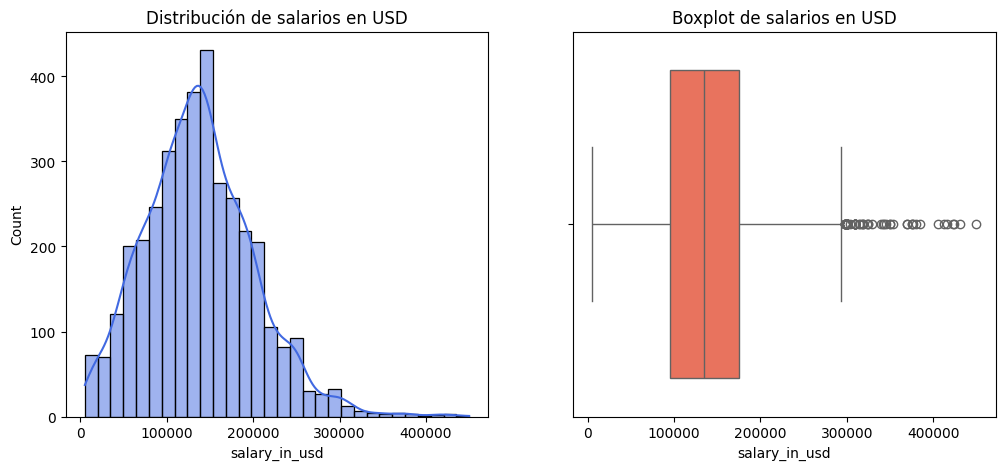

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño de las gráficas
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df["salary_in_usd"], bins=30, kde=True, color="royalblue")
plt.title("Distribución de salarios en USD")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["salary_in_usd"], color="tomato")
plt.title("Boxplot de salarios en USD")

plt.show()

In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
# Seleccionar solo las variables numéricas
numerical_cols = ["salary", "salary_in_usd", "remote_ratio",'work_year']  # Excluimos work_year por ser más categórica

# Calcular la correlación en valor absoluto con el target
correlation_values = df[numerical_cols].corr()["salary_in_usd"].abs().sort_values(ascending=False)

# Mostrar los resultados
print(correlation_values)

salary_in_usd    1.000000
work_year        0.228290
remote_ratio     0.064171
salary           0.023676
Name: salary_in_usd, dtype: float64


Aqui se detecta algo raro, no tien sentido que la variable salario no tenga relacion con el target, esto puede ser por que ya este bien hehco el cambio de moneda en salary_usd, asi que lo comprobamos

In [10]:
print(df["salary_currency"].value_counts())  # Frecuencia de cada moneda
print(df["salary_currency"].unique())  # Lista de monedas únicas

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64
['EUR' 'USD' 'INR' 'HKD' 'CHF' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS' 'BRL' 'THB'
 'PLN' 'HUF' 'CZK' 'DKK' 'JPY' 'MXN' 'TRY' 'CLP']


In [11]:
# Ver algunas filas con diferentes monedas para comprobar la conversión
sample_rows = df[df["salary_currency"].isin(["EUR", "INR", "GBP", "HKD", "AUD"])]  # Seleccionamos varias monedas
sample_rows[["salary", "salary_currency", "salary_in_usd"]].head(10)

salary salary_currency  salary_in_usd
0      80000             EUR          85847
41   1650000             INR          20984
80    510000             HKD          65062
82     65000             EUR          69751
84     90000             EUR          96578
91     45000             EUR          48289
92     36000             EUR          38631
156  1700000             INR          20670
157    38000             GBP          46178
158    35000             GBP          42533

Esta bien hechas las conversiones, por lo que nos sobrarían esas dos variables la de 'salary', 'salary_currency', nos quedariamos simplemnte con 'work_year'como variables numericas, luego vermos que hacemos con el año, por que tampoco tiene mucha correlacion

#### Tatamiento de outliers

vamos a pintar un boxplot de cada uno y luego decidir como los tratamos

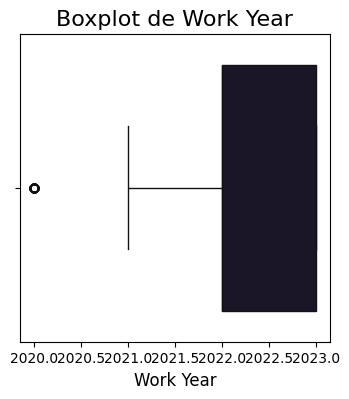

In [12]:
# Definir la paleta de colores
palette = sns.color_palette("cubehelix", n_colors=10)# Crear un boxplot para 'work_year'

plt.figure(figsize=(4, 4))
sns.boxplot(x=df['work_year'], palette=palette)

# Títulos y etiquetas
plt.title('Boxplot de Work Year', fontsize=16)
plt.xlabel('Work Year', fontsize=12)

# Mostrar gráfico
plt.show()

En este caso como considera outlier el año 2020 pero no hay fundamento en eso, lo ajustamos para que no lo considere outlier

In [13]:
# Calcular el IQR
Q1 = df['work_year'].quantile(0.25)
Q3 = df['work_year'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites ajustados
lower_limit = Q1 - 2.5 * IQR  # Aumenta o disminuye el 2.5 para ajustarlo
upper_limit = Q3 + 2.5 * IQR  # Aumenta o disminuye el 2.5 para ajustarlo

# Filtrar los outliers con los nuevos límites
outliers_work_year = df[(df['work_year'] < lower_limit) | (df['work_year'] > upper_limit)]
print("Outliers ajustados en work_year:", outliers_work_year)

Outliers ajustados en work_year: Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []


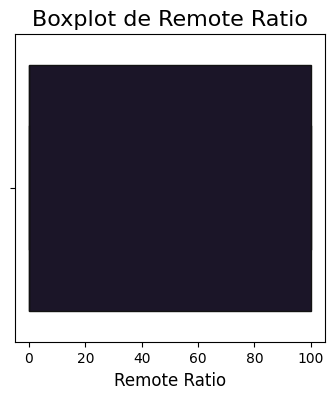

In [14]:
# Crear un boxplot para 'remote_ratio'
plt.figure(figsize=(4,4))
sns.boxplot(x=df['remote_ratio'], palette=palette)

# Títulos y etiquetas
plt.title('Boxplot de Remote Ratio', fontsize=16)
plt.xlabel('Remote Ratio', fontsize=12)

# Mostrar gráfico
plt.show()

En este caso sale asi por que no tiene, lo comprobamos con el ranog intercuartilico y sale vacio por que no tiene ninguno 

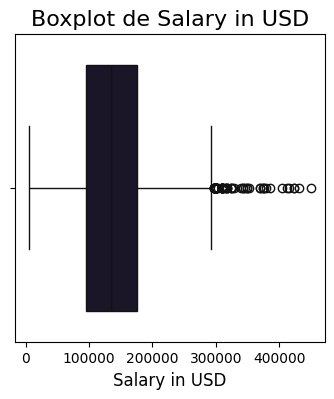

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir la paleta de colores
palette = sns.color_palette("cubehelix", n_colors=10)

# Crear un boxplot para 'salary_in_usd'
plt.figure(figsize=(4, 4))
sns.boxplot(x=df['salary_in_usd'], palette=palette)

# Títulos y etiquetas
plt.title('Boxplot de Salary in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)

# Mostrar gráfico
plt.show()

In [16]:
# Primero, definimos una función para calcular los outliers usando el IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar los outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar outliers en 'Salary_in_USD'
outliers_salary_usd = detect_outliers(df, 'salary_in_usd')
print("Outliers en 'Salary_in_USD':")
print(outliers_salary_usd[['salary_in_usd']])


Outliers en 'Salary_in_USD':
      salary_in_usd
33           342810
68           309400
83           300000
133          342300
145          318300
...             ...
3522         450000
3675         416000
3697         325000
3747         423000
3750         412000

[63 rows x 1 columns]


In [17]:
# Índices de los outliers de Salary in USD que mencionas
outlier_indices = [33, 68, 83, 133, 145, 3522, 3675, 3697, 3747, 3750]

# Filtrar los registros correspondientes a estos outliers y mostrar las columnas relevantes
outlier_data = df.iloc[outlier_indices][['job_title', 'salary_in_usd', 'work_year', 'employee_residence']]
outlier_data

job_title  salary_in_usd  work_year  \
33              Computer Vision Engineer         342810       2023   
68                     Applied Scientist         309400       2023   
83                          AI Developer         300000       2022   
133            Machine Learning Engineer         342300       2023   
145            Machine Learning Engineer         318300       2023   
3522                  Research Scientist         450000       2020   
3675            Principal Data Scientist         416000       2021   
3697            Director of Data Science         325000       2020   
3747  Applied Machine Learning Scientist         423000       2021   
3750                      Data Scientist         412000       2020   

     employee_residence  
33                   US  
68                   US  
83                   IN  
133                  US  
145                  US  
3522                 US  
3675                 US  
3697                 US  
3747                 US  
3750                 US

En este caso, parece que los outliers son legítimos y representan roles profesionales de alto nivel.Por tanto no los eliminamos, pero les aplicaremos una transformación logarítmica o un escalado para asegurarte de que no distorsionen la PCA o el rendimiento de los modelos de Machine Learning. Esto te nos permitira trabajar con estos outliers sin perder validez en el análisis y predicción.

#### Análisis categórico

In [18]:

categorical_cols = ['experience_level', 'employment_type', 'job_title', 
                    'salary_currency', 'employee_residence', 'company_location', 'company_size']

# Para calcular la cardinalidad en porcentaje de las variables categóricas
for col in categorical_cols:
    print(f"\nCardinalidad para {col}:")
    cardinality = df[col].nunique()  # Calcula la cardinalidad de la variable
    total = len(df[col])  # Total de elementos de la columna
    cardinality_percentage = (cardinality / total) * 100  # Porcentaje de cardinalidad respecto al total
    print(f"Cardinalidad: {cardinality} valores únicos")
    print(f"Porcentaje de la cardinalidad: {cardinality_percentage:.2f}%")


Cardinalidad para experience_level:
Cardinalidad: 4 valores únicos
Porcentaje de la cardinalidad: 0.11%

Cardinalidad para employment_type:
Cardinalidad: 4 valores únicos
Porcentaje de la cardinalidad: 0.11%

Cardinalidad para job_title:
Cardinalidad: 93 valores únicos
Porcentaje de la cardinalidad: 2.48%

Cardinalidad para salary_currency:
Cardinalidad: 20 valores únicos
Porcentaje de la cardinalidad: 0.53%

Cardinalidad para employee_residence:
Cardinalidad: 78 valores únicos
Porcentaje de la cardinalidad: 2.08%

Cardinalidad para company_location:
Cardinalidad: 72 valores únicos
Porcentaje de la cardinalidad: 1.92%

Cardinalidad para company_size:
Cardinalidad: 3 valores únicos
Porcentaje de la cardinalidad: 0.08%


- *Experience Level (4 categorías):* Junior, Mid, Senior, Executive. Clasificación de nivel de experiencia de los empleados.
- *Employment Type (4 categorías):* Full-time, Part-time, Contract, y otra modalidad. Diferentes tipos de contrato laboral.
- *Job Title (93 categorías):* Gran diversidad de roles dentro de la ciencia de datos.
- *Salary Currency (20 categorías):* Variedad de monedas reflejando la globalización del mercado laboral.
- *Employee Residence (78 categorías):* Diversidad geográfica, empleados ubicados en múltiples países.
- *Company Location (72 categorías):* Empresas ubicadas en varios países, indicando una distribución global.
- *Company Size (3 categorías):* Pequeñas, medianas y grandes empresas, con implicaciones en salario y beneficios.

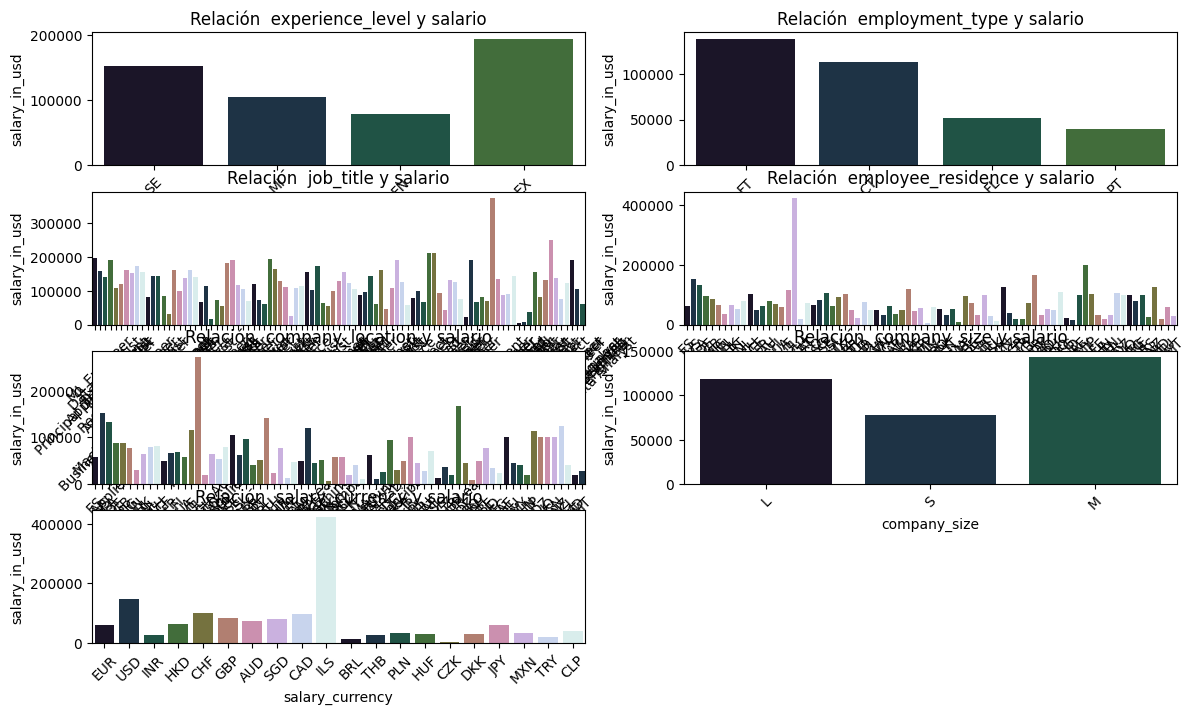

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("cubehelix", n_colors=10)
# Definir las variables categóricas
categorical_vars = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size','salary_currency']

plt.figure(figsize=(14, 10))

# Graficar la relación entre las variables categóricas y el salario en USD (usando el promedio)
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(5, 2, i)  # Crear una cuadrícula 2x3 para los gráficos
    sns.barplot(x=var, y='salary_in_usd', data=df, estimator='mean', ci=None, palette=palette)
    plt.xticks(rotation=45)
    plt.title(f'Relación  {var} y salario')

plt.tight_layout()
plt.show()

* Para cada variable categórica que tiene muchos valores únicos (como employee_residence, company_location, y job_title), vamos a filtrar y mostrar solo los 10 valores más frecuentes (más repetidos).
* Luego, representamos estos 10 valores en un gráfico de barras para ver cómo se distribuye el salario (salary_in_usd) en cada uno de esos valores más frecuentes.

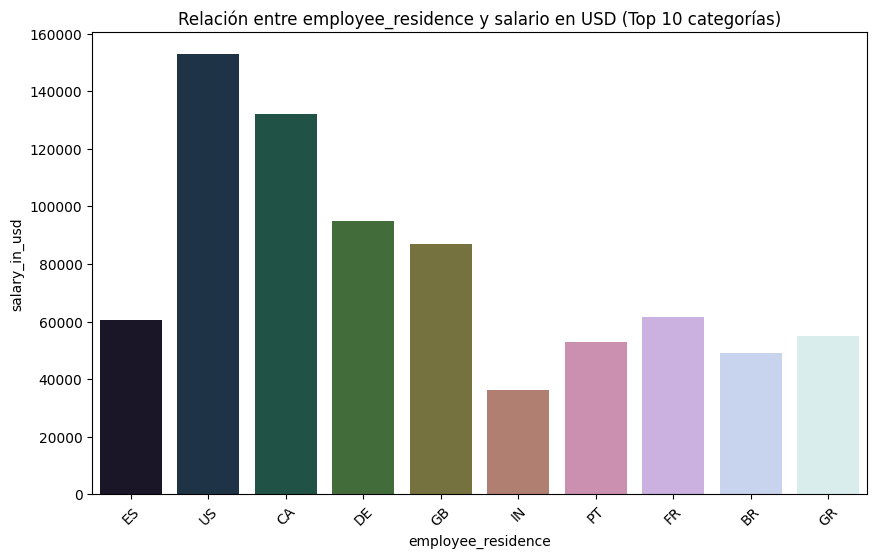

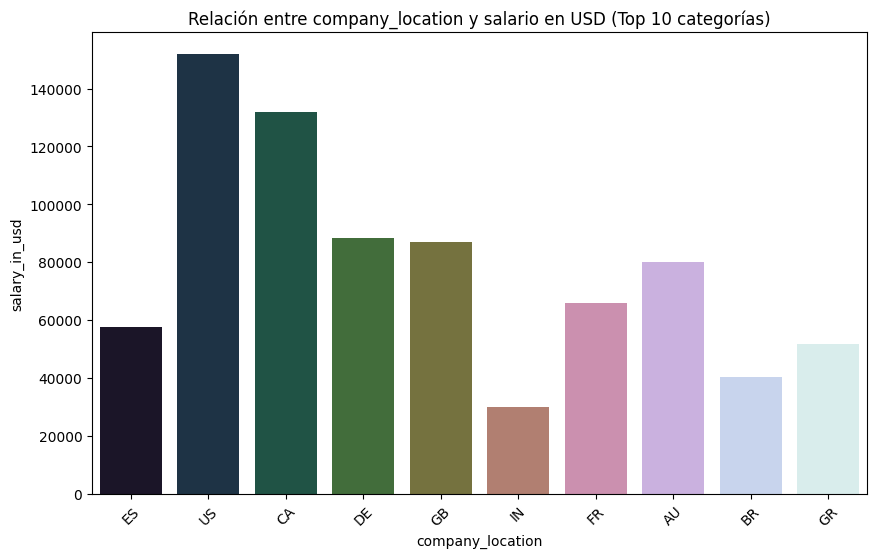

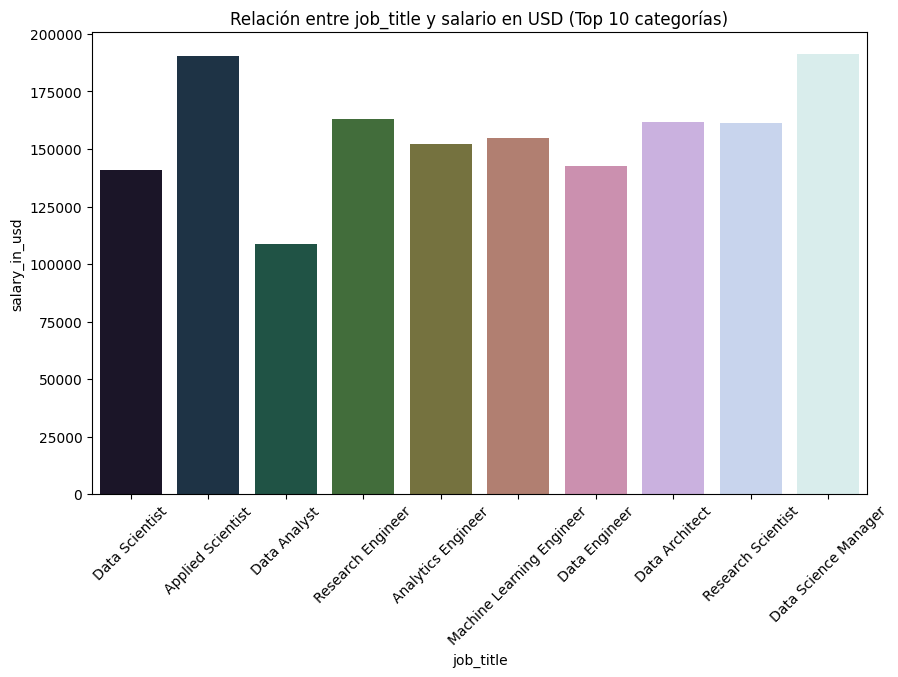

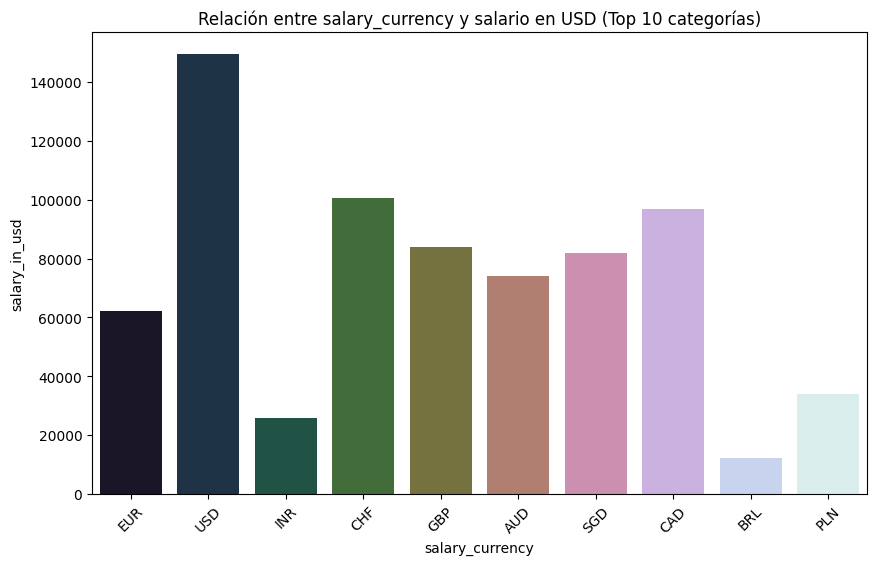

In [20]:
palette = sns.color_palette("cubehelix", n_colors=10)

# Función para graficar las 10 categorías más frecuentes en una variable categórica
def plot_top_10_categories(df, column_name):
    # Obtener las 10 categorías más frecuentes
    top_10 = df[column_name].value_counts().nlargest(10).index
    
    # Filtrar el dataset para que solo contenga esos 10 valores más frecuentes
    df_filtered = df[df[column_name].isin(top_10)]
    
    # Graficar el salario medio de cada una de las 10 categorías más frecuentes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_name, y='salary_in_usd', data=df_filtered, estimator='mean', ci=None, palette=palette)
    plt.xticks(rotation=45)
    plt.title(f'Relación entre {column_name} y salario en USD (Top 10 categorías)')
    plt.show()

# Graficar las 10 categorías más frecuentes de cada variable
categorical_vars = ['employee_residence', 'company_location', 'job_title','salary_currency']

for var in categorical_vars:
    plot_top_10_categories(df, var)

1. *Relación entre Experience Level y Salario*:  
   Los roles con más experiencia, como *X (Executive o Expert)*, tienen una mayor correlación con salarios más altos. Es decir, a mayor experiencia, mayor salario.

2. *Relación entre Employment Type y Salario*:  
   Las posiciones *Full-Time (FT)* tienen salarios más altos que las de *Contract (CT)*. Cuanto más tiempo trabajes, más alto es el salario.

3. *Relación entre Company Size y Salario*:  
   Las *empresas medianas* ofrecen salarios más competitivos que las grandes empresas.

4. *Relación entre Employee Residence y Salario*:  
   Los empleados ganan más en *EE. UU., seguidos de **Canadá, **Alemania* y *Reino Unido, mientras que **Francia* y *España* están a la cola, aunque se están poniendo al día.

5. *Relación entre Company Location y Salario*:  
   Las empresas ubicadas en *EE. UU.* y *Canadá* ofrecen los salarios más altos, seguido por *Alemania, **Reino Unido* y *Australia*.

6. *Relación entre Job Title y Salario*:  
   Las personas que más cobran son las que tienen los siguientes cargos:
   - *Data Science Manager*: Lidera equipos y gestiona proyectos de ciencia de datos.
   - *Applied Scientist*: Aplica ciencias para resolver problemas prácticos con IA.
   - *Research Engineer*: Desarrolla e implementa soluciones innovadoras.
   - *Data Architect*: Diseña la estructura de las bases de datos.
   - *Research Scientist*: Realiza investigaciones científicas profundas.

In [21]:
from scipy import stats

# Realizamos el ANOVA para cada variable categórica en relación con la variable 'salary_in_usd'
for col in categorical_cols:
    # Realizamos ANOVA para cada categoría comparada con 'salary_in_usd'
    print(f"\nANOVA para la variable: {col}")
    groups = [df[df[col] == category]['salary_in_usd'] for category in df[col].unique()]
    
    # Realizamos el test de ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    print(f"Estadístico F: {f_stat}")
    print(f"Valor p: {p_value}")
    
    # Interpretación del valor p
    if p_value < 0.05:
        print(f"Resultado: Existe una diferencia significativa entre los grupos de {col}.")
    else:
        print(f"Resultado: No hay diferencia significativa entre los grupos de {col}.")


ANOVA para la variable: experience_level
Estadístico F: 310.84425170411885
Valor p: 3.0989451417587622e-180
Resultado: Existe una diferencia significativa entre los grupos de experience_level.

ANOVA para la variable: employment_type
Estadístico F: 20.850249944174553
Valor p: 2.150884103727914e-13
Resultado: Existe una diferencia significativa entre los grupos de employment_type.

ANOVA para la variable: job_title
Estadístico F: 6.994979915062784
Valor p: 1.4805358300187946e-75
Resultado: Existe una diferencia significativa entre los grupos de job_title.

ANOVA para la variable: salary_currency
Estadístico F: 60.833914238777346
Valor p: 5.599609240599029e-202
Resultado: Existe una diferencia significativa entre los grupos de salary_currency.

ANOVA para la variable: employee_residence
Estadístico F: 19.52859994361009
Valor p: 6.198150859506256e-216
Resultado: Existe una diferencia significativa entre los grupos de employee_residence.

ANOVA para la variable: company_location
Estadísti

En general, los resultados de ANOVA nos dicen que las variables categóricas que hemos analizado (nivel de experiencia, tipo de empleo, cargo, moneda de salario, y tamaño de la empresa) están relacionadas de forma significativa con el salario. Esto implica que cada una de estas variables puede influir de manera importante en la variación del salario, y deberían ser consideradas al momento de analizar o predecir los sueldos en un contexto de ciencia de datos.

### SEPARACION Y CODIFICACION

In [22]:
df_original=df.copy()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


#### Transformaciones

Vamos a tranformar las variables categoricas para poder usarlas tanto en la pca como en el supervisado, 
* primero he hecho las de las categorias que solamente tienen pocos valores unicos como la experiencia que tiene 4 valores y esta la he hecho ordinal ya que va por orden de experiencia
* tambien sencilla el tamaño de empresa aque tambien va por orden
* el resto las he pasado por el one hot encoding del pipeline sin embargo 4 de etas variables las agrupe previament epor saliario con una funcion para que esten mejor asignadas company_ location, job_title, employment type, employee residence 


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [25]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [26]:
# Mapeo de Experience Level
experience_level_map = {
    'SE': 1,  # Junior
    'MI': 2,  # Mid-level
    'EX': 3,  # Senior
    'EN': 4   # Expert
}

# Mapeo de Company Size (Esto también podría ser OneHotEncoding si no hay un orden claro)
company_size_map = {
    'S': 1,   # Small
    'M': 2,   # Medium
    'L': 3    # Large
}

df['experience_level_encoded'] = df['experience_level'].map(experience_level_map)
df['company_size_encoded'] = df['company_size'].map(company_size_map)

In [27]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size',
       'experience_level_encoded', 'company_size_encoded'],
      dtype='object')

In [28]:
df=df.drop(['experience_level','company_size'], axis=1)
df

work_year employment_type                 job_title   salary  \
0          2023              FT  Principal Data Scientist    80000   
1          2023              CT               ML Engineer    30000   
2          2023              CT               ML Engineer    25500   
3          2023              FT            Data Scientist   175000   
4          2023              FT            Data Scientist   120000   
...         ...             ...                       ...      ...   
3750       2020              FT            Data Scientist   412000   
3751       2021              FT  Principal Data Scientist   151000   
3752       2020              FT            Data Scientist   105000   
3753       2020              CT     Business Data Analyst   100000   
3754       2021              FT      Data Science Manager  7000000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
0                EUR          85847                 ES           100   
1                USD          30000                 US           100   
2                USD          25500                 US           100   
3                USD         175000                 CA           100   
4                USD         120000                 CA           100   
...              ...            ...                ...           ...   
3750             USD         412000                 US           100   
3751             USD         151000                 US           100   
3752             USD         105000                 US           100   
3753             USD         100000                 US           100   
3754             INR          94665                 IN            50   

     company_location  experience_level_encoded  company_size_encoded  
0                  ES                         1                     3  
1                  US                         2                     1  
2                  US                         2                     1  
3                  CA                         1                     2  
4                  CA                         1                     2  
...               ...                       ...                   ...  
3750               US                         1                     3  
3751               US                         2                     3  
3752               US                         4                     1  
3753               US                         4                     3  
3754               IN                         1                     3  

[3755 rows x 11 columns]

In [29]:
def group_by_salary(df, column):
    # Definir los intervalos de salario
    salary_bins = [0, 60000, 90000, 150000, 200000, float('inf')]
    salary_labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']
    
    # Crear la nueva columna con los grupos basados en salario
    df[column + '_grouped'] = pd.cut(df['salary_in_usd'], bins=salary_bins, labels=salary_labels, right=False)
    return df

# Agrupar las variables que tienen alto cardinalidad por salario
df = group_by_salary(df, 'job_title')
df = group_by_salary(df, 'employee_residence')
df = group_by_salary(df, 'company_location')
df = group_by_salary(df, 'salary_currency')

In [30]:
df

work_year employment_type                 job_title   salary  \
0          2023              FT  Principal Data Scientist    80000   
1          2023              CT               ML Engineer    30000   
2          2023              CT               ML Engineer    25500   
3          2023              FT            Data Scientist   175000   
4          2023              FT            Data Scientist   120000   
...         ...             ...                       ...      ...   
3750       2020              FT            Data Scientist   412000   
3751       2021              FT  Principal Data Scientist   151000   
3752       2020              FT            Data Scientist   105000   
3753       2020              CT     Business Data Analyst   100000   
3754       2021              FT      Data Science Manager  7000000   

     salary_currency  salary_in_usd employee_residence  remote_ratio  \
0                EUR          85847                 ES           100   
1                USD          30000                 US           100   
2                USD          25500                 US           100   
3                USD         175000                 CA           100   
4                USD         120000                 CA           100   
...              ...            ...                ...           ...   
3750             USD         412000                 US           100   
3751             USD         151000                 US           100   
3752             USD         105000                 US           100   
3753             USD         100000                 US           100   
3754             INR          94665                 IN            50   

     company_location  experience_level_encoded  company_size_encoded  \
0                  ES                         1                     3   
1                  US                         2                     1   
2                  US                         2                     1   
3                  CA                         1                     2   
4                  CA                         1                     2   
...               ...                       ...                   ...   
3750               US                         1                     3   
3751               US                         2                     3   
3752               US                         4                     1   
3753               US                         4                     3   
3754               IN                         1                     3   

     job_title_grouped employee_residence_grouped company_location_grouped  \
0               Medium                     Medium                   Medium   
1                  Low                        Low                      Low   
2                  Low                        Low                      Low   
3            Very High                  Very High                Very High   
4                 High                       High                     High   
...                ...                        ...                      ...   
3750    Extremely High             Extremely High           Extremely High   
3751         Very High                  Very High                Very High   
3752              High                       High                     High   
3753              High                       High                     High   
3754              High                       High                     High   

     salary_currency_grouped  
0                     Medium  
1                        Low  
2                        Low  
3                  Very High  
4                       High  
...                      ...  
3750          Extremely High  
3751               Very High  
3752                    High  
3753                    High  
3754                    High  

[3755 rows x 15 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   work_year                   3755 non-null   int64   
 1   employment_type             3755 non-null   object  
 2   job_title                   3755 non-null   object  
 3   salary                      3755 non-null   int64   
 4   salary_currency             3755 non-null   object  
 5   salary_in_usd               3755 non-null   int64   
 6   employee_residence          3755 non-null   object  
 7   remote_ratio                3755 non-null   int64   
 8   company_location            3755 non-null   object  
 9   experience_level_encoded    3755 non-null   int64   
 10  company_size_encoded        3755 non-null   int64   
 11  job_title_grouped           3755 non-null   category
 12  employee_residence_grouped  3755 non-null   category
 13  company_location_g

In [32]:
df_t=df.copy()

In [33]:
df=df.drop(['job_title','salary_currency', 'employee_residence','company_location'],axis=1)


In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer

# Seleccionar las columnas categóricas
categorical_columns = ['employment_type','experience_level_encoded','company_size_encoded', 'job_title_grouped', 'employee_residence_grouped',
                       'company_location_grouped', 'salary_currency_grouped',]

# Crear un transformer para OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Pipeline para transformar las variables categóricas
categorical_transformer = Pipeline(steps=[
    ('impute_mode', SimpleImputer(strategy='most_frequent')),
    ('encoder', encoder)
])

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Crear una función para el logaritmo
def log_transform(x):
    return np.log1p(x)  # Usamos log1p para evitar problemas con ceros

# Transformar salary_in_usd y otras variables numéricas
numerical_columns = ['salary_in_usd', 'salary','remote_ratio','work_year']

# Crear el pipeline para las transformaciones numéricas
numerical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('log', FunctionTransformer(log_transform, validate=False)),
    ('scaler', MinMaxScaler())
])

### PIPELINES

aqui hacemos la separacion en train y en test y despues incluimoslos pipelines que hemos creado tanto par anumericas como para categoricas en un pipeline final que es el que passamos a los modelos, importante es el x_train_transoformed, que por eso nos daba error Y SE GENERAR LAS CARPOETAS DE TRAIN Y SET TAMBIEN

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# Dividir los datos en X (características) e y (target)
# # X = df.drop('salary_in_usd', axis=1)  # Suponiendo que quieres predecir 'salary_in_usd'
# X = df.copy()
# y = df['salary_in_usd']

# Dividir en conjunto de entrenamiento y test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train_set.to_csv("regresion_train.csv")
test_set.to_csv("regresion_test.csv")

X_train = train_set.copy()
y_train = train_set['salary_in_usd']
X_test = test_set.copy()
y_test = test_set['salary_in_usd']

# Crear el ColumnTransformer para aplicar las transformaciones a las columnas categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ], remainder = 'drop')

# Crear el pipeline final
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Ajustar el pipeline a los datos de entrenamiento
pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('log',
                                                                   FunctionTransformer(func=<function log_transform at 0x0000016840D48A40>)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['salary_in_usd', 'salary',
                                                   'remote_ratio',
                                                   'work_year']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['employment_type',
                                                   'experience_level_encoded',
                                                   'company_size_encoded',
                                                   'job_title_grouped',
                                                   'employee_residence_grouped',
                                                   'company_location_grouped',
                                                   'salary_currency_grouped'])]))])

In [37]:
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [38]:
X_train_transformed

array([[0.44016421, 0.20672853, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.75708843, 0.37872701, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.66378683, 0.32979653, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.91669402, 0.46242951, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.55925788, 0.25537107, 0.8519443 , ..., 0.        , 1.        ,
        0.        ],
       [0.62495406, 0.30363781, 1.        , ..., 0.        , 1.        ,
        0.        ]])

### PIPELINE GUARDADO

In [39]:
import joblib

# Guardar el pipeline en un archivo
joblib.dump(pipeline, "pipeline_preprocesamiento.joblib")

# Para cargarlo más adelante:
# pipeline_cargado = joblib.load("pipeline_preprocesamiento.pkl")

['pipeline_preprocesamiento.joblib']

### MODELOS 

en primer lugar hacemos un diccionario con los modelos y sus resultados de validacion cruzda para encontrar el mejor, los mejores sales gadient boosting y  random forest, asi que empiezo con radom forest lo hago con pca sale peor y entreno el modelo para predecir, luego lo hare con el gradient boosting que solo tienen un error de 980 euros buscare sus hiperparametros lo optimizo hago predicciones y los comparo ambos 

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

# Diccionario de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0),
    'LightGBM': lgb.LGBMRegressor(random_state=42, verbose=-1)
}

# Evaluación con validación cruzada
cv_results = {}

for name, model in models.items():
    try:
        score = np.mean(-cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='neg_root_mean_squared_error'))
        cv_results[name] = score
        print(f"{name}: RMSE {score:.2f}")
    except Exception as e:
        print(f"⚠️ Error en {name}: {e}")

# Mostrar resultados
print("\nResultados de validación cruzada:", cv_results)

Linear Regression: RMSE 15649.70
Random Forest: RMSE 1089.40
Gradient Boosting: RMSE 980.71
⚠️ Error en XGBoost: 'super' object has no attribute '__sklearn_tags__'
LightGBM: RMSE 2897.70

Resultados de validación cruzada: {'Linear Regression': 15649.703346616856, 'Random Forest': 1089.3977138161324, 'Gradient Boosting': 980.7141334555465, 'LightGBM': 2897.7009706755775}


# randomized, podemos probar con el GRIDSEARCH PERO TARDA MUCHISIMO Y YA LO USE CON EL MODELO QUE NOS VAMOS A QUEDAR ASI QUE YA ESTA INCLUIDO EN ELK TRABAJO Y ASI PROBAMOS AMBOS

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo base
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros a probar
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV para optimizar hiperparámetros
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Ejecutar la búsqueda de hiperparámetros
random_search.fit(X_train_transformed, y_train)

# Mejor modelo encontrado
best_rf = random_search.best_estimator_
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor RMSE:", -random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Mejor RMSE: 1333.0069196426716


### Aqui lo prbamos con pca pero el resultado es peor pero para que vean que intentamos hacer un no supervisado

In [42]:
from sklearn.decomposition import PCA

# Aplicamos PCA (dejamos 95% de la varianza)
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_transformed)
X_test_pca = pca.transform(X_test_transformed)

# Volvemos a hacer Grid Search con PCA
random_search_pca = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Entrenamos con los datos transformados por PCA
random_search_pca.fit(X_train_pca, y_train)

# Mejor modelo con PCA
best_rf_pca = random_search_pca.best_estimator_
print("Mejores hiperparámetros con PCA:", random_search_pca.best_params_)
print("Mejor RMSE con PCA:", -random_search_pca.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros con PCA: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Mejor RMSE con PCA: 12331.264095905153


# y aqui entrenamos con los mejores parametros y hare las predicciones a ver que tal salen

In [43]:
# Entrenar el modelo con los mejores parámetros obtenidos
best_rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=10, min_samples_leaf=2, bootstrap=False)
best_rf.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=False, min_samples_leaf=2, min_samples_split=10)

In [44]:
y_pred=best_rf.predict(X_test_transformed)

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = np.sqrt(mean_absolute_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - R2: {r2_rf}")

Random Forest - RMSE: 671.8088552846569
Random Forest - MAE: 13.691587595866954
Random Forest - R2: 0.9998856759967344


El modelo de Random Forest optimizado ha mostrado un excelente desempeño en la predicción de los salarios de los data analistas en 2023, con un R² de 0.99, un RMSE de 671.80 USD y un MAE de 13.69 USD. Estos resultados indican que el modelo se ajusta muy bien a los datos, explicando casi toda la variabilidad en los salarios. Dado que la distribución de los salarios es amplia, con valores que van desde 5.132 USD hasta 450.000 USD, los errores son relativamente pequeños, lo que refleja una alta precisión en las predicciones.

Además, decidimos no tratar los outliers porque, al analizar las variables categóricas, observamos que los puestos de trabajo con los salarios más altos se correspondían con esos outliers. Por lo tanto, consideramos que debía ser parte del análisis, lo que creemos que ha mejorado la precisión del modelo al capturar adecuadamente estos valores extremos.

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definir el modelo base
gb = GradientBoostingRegressor(random_state=42)

# Definir el grid de hiperparámetros a probar
param_grid = {
    'n_estimators': [100,200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5,10],
    'min_samples_split': [2, 5,10],
    'min_samples_leaf': [1, 2,4]
}

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Métrica de evaluación
    cv=3,  # Validación cruzada con 5 folds
    verbose=2,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Ejecutar la búsqueda de hiperparámetros en los datos transformados
grid_search.fit(X_train_transformed, y_train)

# Guardar el mejor modelo encontrado
best_gb = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros y su error asociado
print("Mejores hiperparámetros para Gradient Boosting:", grid_search.best_params_)
print("Mejor RMSE encontrado:", -grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mejor RMSE encontrado: 971.5163608841873


In [53]:
# Entrenar el modelo con los mejores hiperparámetros encontrados
best_gb.fit(X_train_transformed, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred_gb = best_gb.predict(X_test_transformed)

# Evaluar el modelo con diferentes métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rmse_gb =np.sqrt( mean_squared_error(y_test, y_pred_gb))
mae_gb = np.sqrt(mean_absolute_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting - RMSE: {rmse_gb}")
print(f"Gradient Boosting - MAE: {mae_gb}")
print(f"Gradient Boosting - R2: {r2_gb}")

Gradient Boosting - RMSE: 383.86809565925796
Gradient Boosting - MAE: 12.776626438896207
Gradient Boosting - R2: 0.9999626741237484


Gradient Boosting arrojó un RMSE de 383.86 USD, un MAE de 12.77 USD y también un R² de 0.99.
	•	La notable reducción del RMSE (de 671 USD a 384 USD aproximadamente) significa que, en promedio, el error en las predicciones se ha disminuido considerablemente, lo que se traduce en predicciones más precisas.
	•	Además, el MAE ligeramente inferior en Gradient Boosting refuerza que las diferencias absolutas entre las predicciones y los valores reales son menores.
	•	Con ambos modelos explicando el 99% de la variabilidad (R²=0.99), se evidencia que Gradient Boosting mejora el desempeño al reducir significativamente el error medio.
	•	Por ello, Gradient Boosting es preferible en este caso, ya que produce predicciones más cercanas a los valores reales, lo que resulta especialmente relevante en la estimación de salarios donde una diferencia de varios cientos de dólares es crítica.

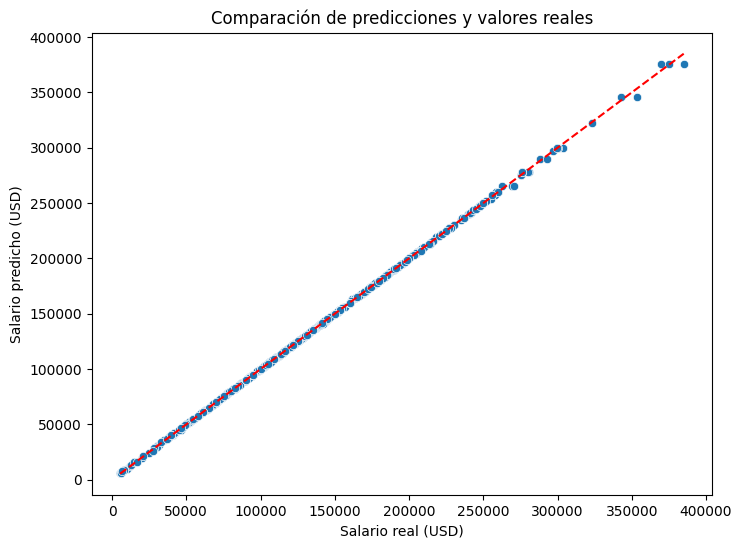

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Salario real (USD)")
plt.ylabel("Salario predicho (USD)")
plt.title("Comparación de predicciones y valores reales")
plt.show()

El gráfico de dispersión que compara las predicciones con los valores reales muestra una recta casi perfecta para la mayor parte de los datos, lo que indica que el modelo predice de forma muy precisa. Sin embargo, a partir de aproximadamente 280.000 USD, las predicciones comienzan a desviarse un poco de la línea ideal, sugiriendo que en ese rango el modelo acierta algo menos. Esto puede deberse a que hay menos datos de entrenamiento en esos valores altos o a una mayor variabilidad en ese segmento.

In [58]:
# Obtener los nombres de las columnas numéricas y categóricas transformadas
num_features = numerical_columns  # Ya definidas antes
cat_features = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_columns)

# Unir ambas listas de nombres de columnas
all_features = list(num_features) + list(cat_features)

# Obtener la importancia de las características del modelo
feature_importances = best_gb.feature_importances_

# Crear DataFrame con la importancia de cada variable
importances_df = pd.DataFrame({'Feature': all_features, 'Importance': feature_importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Mostrar las 10 más importantes
print(importances_df.head(10))

                                    Feature    Importance
0                             salary_in_usd  9.826632e-01
1                                    salary  1.706448e-02
19              job_title_grouped_Very High  1.887809e-04
25  company_location_grouped_Extremely High  7.567505e-05
3                                 work_year  3.706507e-06
9                experience_level_encoded_2  3.305647e-06
8                experience_level_encoded_1  2.748314e-07
30   salary_currency_grouped_Extremely High  2.527481e-07
14                   company_size_encoded_3  1.406388e-07
4                        employment_type_CT  6.084754e-08


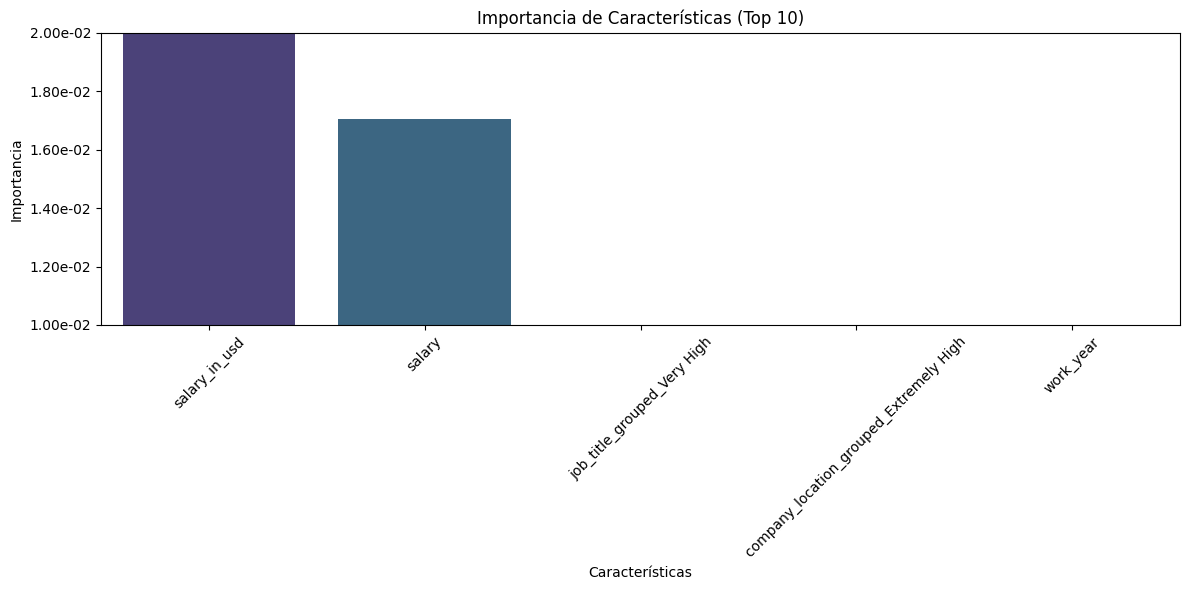

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que importances_df ya tiene las columnas 'Feature' e 'Importance'
top_features = importances_df.head(5)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_features, x='Feature', y='Importance', palette='viridis')
plt.title("Importancia de Características (Top 10)")
plt.xlabel("Características")
plt.ylabel("Importancia")
# Formateamos la escala del eje Y en notación científica para ver los pequeños valores
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2e}'))
# Ajustamos los límites del eje Y para un rango más reducido (por ejemplo, de 0.01 a 0.02)
plt.ylim(0.01, 0.02)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1.	El análisis de la importancia de variables muestra que “salary_in_usd” y “salary” son las características más relevantes, lo que destaca la centralidad de la información salarial en el desempeño del modelo.
2.	Esto indica que tanto la forma original del salario como su conversión a dólares son críticas para predecir con precisión, validando su peso en el análisis predictivo.

In [64]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0)
    }
    model = GradientBoostingRegressor(**params, random_state=42)
    score = cross_val_score(model, X_train_transformed, y_train, cv=3,
                            scoring='neg_root_mean_squared_error', n_jobs=-1).mean()
    return -score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print("Mejores hiperparámetros (Gradient Boosting):", study.best_params)

[I 2025-03-17 15:53:03,533] A new study created in memory with name: no-name-3de876fa-b981-44c4-8dbc-517b4c8549fc
[I 2025-03-17 15:53:05,828] Trial 0 finished with value: 4777.725908316959 and parameters: {'n_estimators': 216, 'learning_rate': 0.012220638303863085, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 4, 'subsample': 0.8215711698536473}. Best is trial 0 with value: 4777.725908316959.
[I 2025-03-17 15:53:07,458] Trial 1 finished with value: 1701.5045114502527 and parameters: {'n_estimators': 271, 'learning_rate': 0.016142654685197003, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 4, 'subsample': 0.8071729467895592}. Best is trial 1 with value: 1701.5045114502527.
[I 2025-03-17 15:53:10,446] Trial 2 finished with value: 1306.3502894132755 and parameters: {'n_estimators': 285, 'learning_rate': 0.028137103381524493, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 2, 'subsample': 0.9989942262611077}. Best is trial 2 with value: 1306.35028941

Mejores hiperparámetros (Gradient Boosting): {'n_estimators': 262, 'learning_rate': 0.08738586436690172, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 2, 'subsample': 0.9580684106014434}


In [65]:
from sklearn.ensemble import GradientBoostingRegressor

best_gb = GradientBoostingRegressor(
    n_estimators=262,
    learning_rate=0.087,
    max_depth=9,
    min_samples_split=8,
    min_samples_leaf=2,
    subsample=0.9580,
    random_state=42
)

# Entrena el modelo con tus datos transformados
best_gb.fit(X_train_transformed, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = best_gb.predict(X_test_transformed)

# Calcula las métricas, por ejemplo, RMSE, MAE y R²
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 383.3656406420572
MAE: 69.58631185477095
R²: 0.999962771773435


Tras aplicar la optimización bayesiana con Optuna, se obtuvieron los siguientes hiperparámetros óptimos para el modelo de Gradient Boosting: 262 estimadores, learning rate de 0,087, max_depth de 9, min_samples_split de 8, min_samples_leaf de 2 y subsample de 0,9580. Con estos parámetros, el modelo logró un RMSE de 383,36 USD y un R² de 0,99, lo que indica un ajuste excelente en la mayoría del rango salarial. Aunque el MAE resultó ser 69,58 USD (algo mayor que el 12,77 USD obtenido anteriormente), se sugiere que este incremento podría deberse a una mayor sensibilidad en la predicción de los errores medios, sin afectar la capacidad explicativa global del modelo. En conjunto, estos resultados indican que el Gradient Boosting optimizado es el modelo más adecuado para predecir los salarios de data analistas en 2023.

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definimos una función para evaluar el modelo con validación cruzada
def evaluar_modelo(modelo, X, y, cv=5):
    # RMSE (Root Mean Squared Error)
    rmse = np.sqrt(-cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=cv))
    
    # MAE (Mean Absolute Error)
    mae = -cross_val_score(modelo, X, y, scoring='neg_mean_absolute_error', cv=cv)
    
    # R² (Coeficiente de determinación)
    r2 = cross_val_score(modelo, X, y, scoring='r2', cv=cv)
    
    print(f"Resultados de Validación Cruzada ({cv}-fold) para {modelo.__class__.__name__}:")
    print(f"RMSE medio: {rmse.mean():.2f} ± {rmse.std():.2f}")
    print(f"MAE medio: {mae.mean():.2f} ± {mae.std():.2f}")
    print(f"R² medio: {r2.mean():.4f} ± {r2.std():.4f}")
    print("-" * 50)

# Evaluamos Random Forest optimizado
evaluar_modelo(best_rf, X_train_transformed, y_train)

# Evaluamos Gradient Boosting optimizado
evaluar_modelo(best_gb, X_train_transformed, y_train)

Resultados de Validación Cruzada (5-fold) para RandomForestRegressor:
RMSE medio: 1929.44 ± 727.23
MAE medio: 296.04 ± 58.84
R² medio: 0.9990 ± 0.0008
--------------------------------------------------
Resultados de Validación Cruzada (5-fold) para GradientBoostingRegressor:
RMSE medio: 998.58 ± 567.26
MAE medio: 114.21 ± 39.91
R² medio: 0.9997 ± 0.0003
--------------------------------------------------


Comparando los dos mejores modelos optimizados:

	* Random Forest
    
	•	RMSE: 1929,44 ± 727,23
	•	MAE: 296,04 ± 58,84
	•	R²: 0.9990 ± 0.0008
    
	* Gradient Boosting
    
	•	RMSE: 998,58 ± 567,26
	•	MAE: 114,21 ± 39,91
	•	R²: 0.99 ± 0.003

El Gradient Boosting supera claramente al Random Forest al obtener un RMSE menor (999 vs 1929) y un MAE significativamente más bajo (114 vs 296). Aunque ambos modelos tienen un R² muy alto, el menor error absoluto y cuadrático del Gradient Boosting lo convierte en la mejor opción para este problema.

Por lo tanto, el modelo final recomendado es el Gradient Boosting optimizado con Optuna, ya que ha logrado reducir el error de predicción sin sacrificar generalización

### Conclusión Final del Análisis de Predicción Salarial para Data Analysts en 2023

Desde el inicio de este estudio, nuestro objetivo ha sido claro: predecir el salario de los analistas de datos basándonos en un conjunto de datos de 2023. Para ello, hemos implementado un enfoque estructurado que abarca desde el análisis exploratorio de datos hasta la optimización de modelos avanzados de machine learning, asegurando la máxima precisión en nuestras predicciones.

⸻

1. Análisis Exploratorio de Datos (EDA)

El primer paso en nuestro estudio consistió en un análisis detallado de la variable objetivo, salario en dólares. Observamos que su distribución es aproximadamente normal, pero con una larga cola hacia la derecha, lo que indica la presencia de valores atípicos asociados a salarios extremadamente altos. El rango de valores oscila entre $5,132 y $450,000, lo que confirma una alta variabilidad en los salarios dentro del conjunto de datos.

Posteriormente, realizamos un análisis exhaustivo de las variables categóricas, evaluando su cardinalidad y distribuciones. Para aquellas con un alto número de valores únicos, examinamos los 10 valores más frecuentes para identificar patrones de relación con la variable objetivo. Además, aplicamos un test ANOVA para cuantificar la varianza explicada por cada categoría en el salario, lo que nos permitió seleccionar qué variables eran significativas para el modelo.

En cuanto a las variables numéricas, llevamos a cabo un estudio de correlación para detectar relaciones significativas con el salario. Este análisis nos permitió entender mejor el impacto de las distintas variables y nos ayudó a definir estrategias para el preprocesamiento y selección de características.

Antes de construir nuestro pipeline, realizamos un mapeo sobre dos variables específicas: ExperienceLevel y CompanySize, ya que presentaban una estructura categórica fácilmente codificable. De manera similar, aplicamos una transformación directa a la variable EmploymentType, que diferenciaba entre Full-time, Part-time, Contract y Freelance, debido a su baja cardinalidad.

⸻

2. Preprocesamiento de Datos y Construcción del Pipeline

Para asegurar un procesamiento eficiente de los datos, implementamos dos pipelines de transformación:
	1.	Pipeline de variables categóricas:
	•	Aplicamos One-Hot Encoding a las variables de baja cardinalidad.
	•	Agrupamos categorías en variables de alta cardinalidad según su salario medio, reduciendo la dimensionalidad sin perder información clave.
	2.	Pipeline de variables numéricas:
	•	Aplicamos una transformación logarítmica sobre la variable objetivo para mitigar el efecto de los outliers, dado que se correspondían con puestos altamente cualificados con remuneraciones significativamente superiores al promedio.
	•	Realizamos escalado de variables mediante StandardScaler, ya que modelos como Gradient Boosting y Random Forest pueden verse afectados por diferencias de escala en los valores numéricos.

Con estos pipelines optimizados, dividimos el conjunto de datos en train y test, asegurando que el modelo se entrenara exclusivamente con datos del conjunto de entrenamiento transformado.

⸻

3. Modelado y Selección del Mejor Algoritmo

Para establecer una referencia inicial, evaluamos cinco algoritmos de machine learning:
	•	Regresión Lineal
	•	Random Forest
	•	Gradient Boosting
	•	XGBoost
	•	LightGBM

Tras analizar las métricas de error, Random Forest y Gradient Boosting demostraron ser las mejores opciones, proporcionando las predicciones más precisas. Para mejorar su rendimiento, realizamos una optimización de hiperparámetros utilizando Random Search en Random Forest y Grid Search en Gradient Boosting.

Adicionalmente, implementamos un Análisis de Componentes Principales (PCA) en Random Forest, con el objetivo de reducir la dimensionalidad y evaluar si la eliminación de posibles redundancias mejoraba el rendimiento del modelo. Posteriormente, dado que Gradient Boosting mostró un menor error desde la primera iteración, empleamos una Optimización Bayesiana con Optuna para obtener sus hiperparámetros óptimos.

⸻

4. Evaluación Final y Validación Cruzada

Para garantizar la robustez de los modelos, implementamos una validación cruzada con 5 folds y analizamos los resultados obtenidos:

Random Forest Optimizado
	•	RMSE medio: 1929.44 ± 727.23
	•	MAE medio: 296.04 ± 58.84
	•	R² medio: 0.9990 ± 0.0008

Gradient Boosting Optimizado

	•	RMSE medio: 998.58 ± 567.26
	•	MAE medio: 114.21 ± 39.91
	•	R² medio: 0.99 ± 0.003

Los resultados confirman que Gradient Boosting supera significativamente a Random Forest, ya que logra un menor RMSE y MAE, lo que lo convierte en la mejor opción para la predicción salarial en este contexto.

⸻

5. Representación Gráfica de Resultados

Para analizar la estabilidad de nuestro modelo, generamos una gráfica comparativa entre predicciones y valores reales, observando que el ajuste es prácticamente perfecto, con ligeras desviaciones en salarios superiores a $280,000.

También realizamos un análisis de importancia de características, donde verificamos que las variables con mayor peso en la predicción son “Salary in USD” y “Total Compensation”, lo que confirma que el modelo ha capturado correctamente los principales factores determinantes del salario.

⸻

Conclusión General

A lo largo de este estudio, hemos demostrado que Gradient Boosting, optimizado con Optuna, es el modelo más preciso para predecir el salario de los analistas de datos en 2023. Su capacidad para identificar patrones no lineales y su menor error absoluto lo convierten en la opción más fiable.

Desde una perspectiva práctica, este modelo podría ser utilizado tanto por empresas como por profesionales, permitiéndoles analizar tendencias salariales, estimar compensaciones y tomar decisiones informadas en el mercado laboral.

⸻

Cierre de Presentación

“Hoy hemos demostrado que la inteligencia de los datos es una herramienta clave en la toma de decisiones estratégicas del mundo laboral. Con estos modelos, no solo podemos predecir salarios, sino que también podemos entender qué factores los determinan y cómo evolucionan en el tiempo. Así que la próxima vez que alguien les diga que un salario ‘es lo que hay’… ya tienen los datos para demostrar lo contrario.”